##### Name: Abigail Banting

# Predicting League of Legends Player Division Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# Load The Data

In [2]:
bronze_df = pd.read_csv('bronze.csv')
silver_df = pd.read_csv('silver.csv')
gold_df = pd.read_csv('gold.csv')
platinum_df = pd.read_csv('platinum.csv')
diamond_df = pd.read_csv('diamond.csv') 
df = pd.read_csv('equal.csv')

In [3]:
df.head()

,highestAchievedSeasonTier,kills,deaths,assists,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,totalDamageDealt,totalDamageDealtToChampions,damageSelfMitigated,...,visionScore,totalDamageTaken,goldEarned,goldSpent,turretKills,inhibitorKills,totalMinionsKilled,neutralMinionsKilled,visionWardsBoughtInGame,wardsPlaced
0,GOLD,24,14,15,8,3,534,495365,74122,35721,...,40,53588,28906,29845,2,1,403,29,1,15
1,SILVER,8,17,22,2,2,535,99302,33462,15806,...,52,45592,18845,15075,0,0,68,0,1,20
2,GOLD,7,7,29,2,1,756,232614,30497,60578,...,51,74041,19404,17960,2,0,86,87,3,19
3,SILVER,10,10,20,3,1,466,247818,48215,21393,...,36,34139,20805,18475,1,0,287,0,1,11
4,SILVER,8,15,12,3,1,1003,198357,29891,80220,...,29,75674,19921,16075,0,1,57,86,0,16


In [4]:
bronze_df['division'] = 0
silver_df['division'] = 1
gold_df['division'] = 2
platinum_df['division'] = 3
diamond_df['division'] = 4
combined_df = bronze_df.append([gold_df, silver_df, platinum_df, diamond_df])
combined_df.head()
combined_df.tail()

,kills,deaths,assists,longestTimeSpentLiving,totalDamageDealtToChampions,visionScore,gold/min,cs/min,wins/lose,division
995,15.1,10.6,15.5,1237.6,36710.9,39.1,448.847350,7.014401,0.559259,4
996,8.6,9.2,18.0,1197.4,21065.6,61.2,360.763095,4.299711,0.510264,4
997,9.5,9.9,18.4,1248.2,35880.7,58.0,397.702902,6.207016,0.542169,4
998,14.0,11.2,13.6,1210.5,32058.1,46.0,412.889115,5.717192,0.523490,4
999,7.4,10.1,21.4,1220.6,28870.9,65.0,373.800736,4.760259,0.506112,4


# Standardized The Data

In [5]:
# Set up variables 
features = ['kills', 'deaths', 'assists', 'longestTimeSpentLiving', 'totalDamageDealtToChampions', 'visionScore', 'gold/min', 'cs/min', 'wins/lose']
divisions = ['Bronze','Silver','Gold','Platinum','Diamond']

X = combined_df.loc[:,features].values
y = combined_df.loc[:,['division']].values.ravel()

In [6]:
# Split Data into 70% training set and 30% test set
def standardized():
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=9, stratify=y)

    sc = StandardScaler()
    sc.fit(X_train) 
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=9, stratify=y)

sc = StandardScaler()
sc.fit(X_train) 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
w = [0,0,0,0,0]
for i in y_test:
    w[i] += 1
print(w)

[300, 300, 300, 300, 300]


In [7]:
#Friend test
##predict_test = [4.875,1.625,4.125,822.625,14175.75,24.375,404.7923791,7.278944797,0.550387597]
predict_test = [2.3,4.9,12.8,685.1,9892.45,57.35,298.9750529,0.569978858,0.487323944]
p_x = np.array(predict_test)
# p_x.reshape(1, -1)
# sc = StandardScaler()
# sc.fit(predict_test)


# Data Vizualization

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math 
import seaborn as sns

In [ ]:
sns.pairplot(combined_df[combined_df.columns], hue='division',size=5)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,18)) 
cm = np.corrcoef(X)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=combined_df.columns[0:9],xticklabels=combined_df.columns[0:9],ax=ax)
plt.show()
sns.reset_orig()

# SVM Models

In [9]:
from sklearn.svm import SVC

In [10]:
def svm_model(kernel,c,g=1):
    if kernel == 'linear':
        svm = SVC(kernel=kernel, C=c)
    else:
        svm = SVC(kernel=kernel, C=c, gamma=g)
        
    svm.fit(X_train_std,y_train)
      
    w = [0,0,0,0,0]
    for i in svm.predict(X_test_std):
        w[i] += 1
    print(w)
    print(svm.predict(p_x.reshape(1,-1)))
    
    print(kernel," : ",svm.score(X_test_std, y_test))

In [11]:
# Define Parameters and Kernels
kernel = ('linear', 'rbf', 'sigmoid')
C = [.01, 1, 10, 100]
gamma = [.001,.1, 1, 10]

In [12]:
# Using Linear Kernel
svm_model(kernel[0],C[0],gamma[1])
svm_model(kernel[0],C[1],gamma[1])
svm_model(kernel[0],C[2],gamma[1])

#Using RBF
print()
svm_model(kernel[1],C[0],gamma[2])
svm_model(kernel[1],C[1],gamma[1])
svm_model(kernel[1],C[2],gamma[2])

# Using Sigmoid
print()
svm_model(kernel[2],C[0],gamma[1])
svm_model(kernel[2],C[1],gamma[1])
svm_model(kernel[2],C[2],gamma[1])

[296, 301, 313, 235, 355]
[0]
linear  :  0.636666666667
[305, 300, 338, 199, 358]
[1]
linear  :  0.654666666667
[304, 300, 339, 198, 359]
[0]
linear  :  0.654666666667

[985, 118, 233, 82, 82]
[0]
rbf  :  0.382
[317, 300, 314, 221, 348]
[0]
rbf  :  0.661333333333
[344, 287, 298, 296, 275]
[0]
rbf  :  0.588

[270, 304, 365, 150, 411]
[0]
sigmoid  :  0.612
[387, 299, 279, 66, 469]
[0]
sigmoid  :  0.5
[385, 312, 270, 66, 467]
[0]
sigmoid  :  0.487333333333


# Regression Models

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
def regressionModel(regressor):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=9, stratify=y)
    model = regressor
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=9)
    
    validation_score = model.score(X_val, y_val)
    
    print("Train: %.3f Validation: %.3f Test: %.3f \n" %(train_score, validation_score, test_score))
#     w = [0,0,0,0,0]
#     for q in model.predict(X_test):
#         w[q] += 1
#     print(w)

    print("Friend Stat:", model.predict(p_x.reshape(1,-1)))

In [15]:
print("ElasticNet")
regressionModel(ElasticNet(alpha=.001, l1_ratio=.2))
print("Lasso")
regressionModel(Lasso(alpha=.00001))
print("Ridge")
regressionModel(Ridge(alpha=.1))

ElasticNet
Train: 0.513 Validation: 0.515 Test: 0.535 

Friend Stat: [ 0.79328767]
Lasso
Train: 0.516 Validation: 0.518 Test: 0.539 

Friend Stat: [ 0.79232663]
Ridge
Train: 0.516 Validation: 0.518 Test: 0.539 

Friend Stat: [ 0.79227801]


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
def logisticRegression(penalty, c):
    standardized()
    lr = LogisticRegression(penalty=penalty, C=c,  random_state=1)
    lr.fit(X_train_std, y_train)
    
    print('Accuracy with', penalty,'regularization and C = %.f: %.2f' %(c,lr.score(X_test_std, y_test)))
    w = [0,0,0,0,0]
    for q in lr.predict(X_test):
        w[q] += 1
    print(w)

    print("Friend Stat:", lr.predict(p_x.reshape(1,-1)))

In [18]:
C = [.01, 1, 100]
penalty = ['l1', 'l2']

for p in penalty:
    for c in C:
        logisticRegression(p,c)

Accuracy with l1 regularization and C = 0: 0.59
[0, 0, 1500, 0, 0]
Friend Stat: [2]
Accuracy with l1 regularization and C = 1: 0.64
[1500, 0, 0, 0, 0]
Friend Stat: [0]
Accuracy with l1 regularization and C = 100: 0.64
[0, 1500, 0, 0, 0]
Friend Stat: [1]
Accuracy with l2 regularization and C = 0: 0.61
[1500, 0, 0, 0, 0]
Friend Stat: [0]
Accuracy with l2 regularization and C = 1: 0.64
[1500, 0, 0, 0, 0]
Friend Stat: [0]
Accuracy with l2 regularization and C = 100: 0.64
[0, 1500, 0, 0, 0]
Friend Stat: [1]


## Multinomial Logistic Regression

In [19]:
def multiRegression(penalty, c):
    standardized()
    
    lr = LogisticRegression(penalty=penalty, C=c, multi_class='multinomial', solver='saga', max_iter= 5000, random_state=1)
    lr.fit(X_train_std, y_train)
    
    w = [0,0,0,0,0]
    for i in lr.predict(X_test):
        w[i] += 1
    print(w)
    
    print('Accuracy with', penalty,'regularization and C = %.f: %.2f' %(c,lr.score(X_test_std, y_test)))
    w = [0,0,0,0,0]
    for q in lr.predict(X_test):
        w[q] += 1
    print(w)

    print("Friend Stat:", lr.predict(p_x.reshape(1,-1)))

In [20]:
C = [.01, 1, 1000]
for p in penalty:
    for c in C:
        multiRegression(p,c)

[0, 0, 1500, 0, 0]
Accuracy with l1 regularization and C = 0: 0.58
[0, 0, 1500, 0, 0]
Friend Stat: [2]
[1500, 0, 0, 0, 0]
Accuracy with l1 regularization and C = 1: 0.64
[1500, 0, 0, 0, 0]
Friend Stat: [0]
[0, 1500, 0, 0, 0]
Accuracy with l1 regularization and C = 1000: 0.65
[0, 1500, 0, 0, 0]
Friend Stat: [1]
[1500, 0, 0, 0, 0]
Accuracy with l2 regularization and C = 0: 0.63
[1500, 0, 0, 0, 0]
Friend Stat: [0]
[1500, 0, 0, 0, 0]
Accuracy with l2 regularization and C = 1: 0.65
[1500, 0, 0, 0, 0]
Friend Stat: [0]
[0, 1500, 0, 0, 0]
Accuracy with l2 regularization and C = 1000: 0.65
[0, 1500, 0, 0, 0]
Friend Stat: [1]


# Tree Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from matplotlib.ticker import MaxNLocator 

### K-neighbor classifier

In [22]:
clf = KNeighborsClassifier(n_neighbors=100, algorithm="auto")
clf.fit(X_train_std,y_train)
print("Score: ",clf.score(X_test_std,y_test))

w = [0,0,0,0,0]
for q in clf.predict(X_test_std):
    w[q] += 1
print(w)

print("Friend Stat:", clf.predict(p_x.reshape(1,-1)))

Score:  0.642
[283, 301, 315, 172, 429]
Friend Stat: [0]


### DecisionTreeClassifier

In [23]:
# Fit for various depth trees
MaxDepth = 30
Errors = np.zeros((MaxDepth,2))

#print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train_std, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
      
    Errors[i,0] = 1 - tree.score(X_train_std,y_train)
    Errors[i,1] = 1 - tree.score(X_test_std,y_test)
    #print(i+1,Errors[i,0],Errors[i,1])

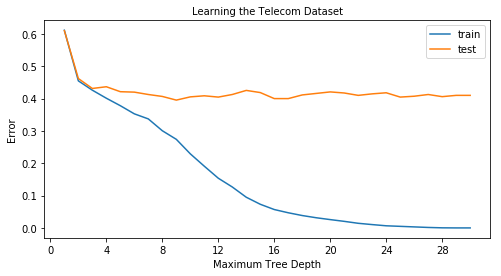

Score: 0.59
[24, 0, 1476, 0, 0]
Friend Stat: [0]


In [24]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning the Telecom Dataset', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 
print("Score:", tree.score(X_test_std, y_test))

w = [0,0,0,0,0]
for q in tree.predict(X_test):
    w[q] += 1
print(w)

print("Friend Stat:", tree.predict(p_x.reshape(1,-1)))

### Random Forest Classifier

In [25]:
# Fit for various depth trees
MaxDepth = 40
Errors = np.zeros((MaxDepth,2))

#print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):    
    randomTree = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i+1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
    
    randomTree.fit(X_train_std, y_train)
      
    Errors[i,0] = 1 - randomTree.score(X_train_std,y_train)
    Errors[i,1] = 1 - randomTree.score(X_test_std,y_test)
    #print(i+1,Errors[i,0],Errors[i,1])
    

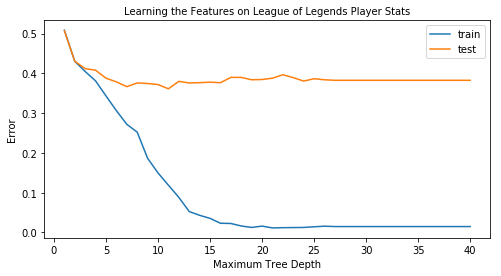

Score: 0.617333333333
[0, 0, 121, 1379, 0]
Friend Stat: [2]


In [26]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning the Features on League of Legends Player Stats', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

print("Score:",randomTree.score(X_test_std,y_test))

w = [0,0,0,0,0]
for q in randomTree.predict(X_test):
    w[q] += 1
print(w)

print("Friend Stat:", randomTree.predict(p_x.reshape(1,-1)))

### AdaBoost

In [27]:
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = AdaBoostClassifier(DecisionTreeClassifier(max_depth=MaxDepth),learning_rate=.1)
    tree.fit(X_train, y_train)
      
    Errors[i,0] =  1 - tree.score(X_train,y_train)
    Errors[i,1] =  1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.242571428571 0.403333333333
2 0.242571428571 0.404
3 0.242571428571 0.404
4 0.242571428571 0.405333333333
5 0.242571428571 0.405333333333


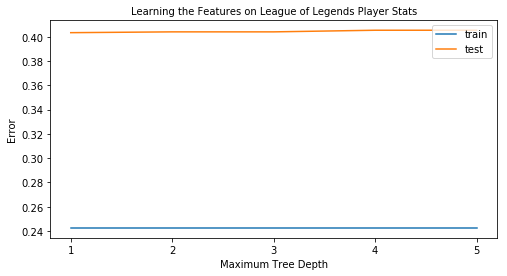

Score 0.594666666667
[236, 299, 365, 242, 358]
Friend Stat: [1]


In [28]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning the Features on League of Legends Player Stats', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

print("Score",tree.score(X_test, y_test))

w = [0,0,0,0,0]
for q in tree.predict(X_test):
    w[q] += 1
print(w)

print("Friend Stat:", tree.predict(p_x.reshape(1,-1)))

# Neural Network

In [29]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier()
clf.fit(X_train,y_train)
print("Train:",clf.score(X_train, y_train))
print("Test:",clf.score(X_test,y_test))
w = [0,0,0,0,0]
for q in clf.predict(X_test):
    w[q] += 1
print(w)

print("Friend Stat:", clf.predict(p_x.reshape(1,-1)))